# AMOCarray demo

The purpose of this notebook is to demonstrate the functionality of `AMOCarray`.

The demo is organised to show

- Step 1: Loading and plotting a sample dataset

- Step 2: Exploring the dataset attributes and variables.

Note that when you submit a pull request, you should `clear all outputs` from your python notebook for a cleaner merge.


In [1]:
import pathlib
import sys

script_dir = pathlib.Path().parent.absolute()
parent_dir = script_dir.parents[0]
sys.path.append(str(parent_dir))

import importlib

import xarray as xr
import os
from amocarray import readers, plotters, standardise

In [2]:
# Specify the path for writing datafiles
data_path = os.path.join(parent_dir, "data")

### Load RAPID 26°N

In [3]:
# Load data from data/moc_transports
ds_rapid = readers.load_sample_dataset()
ds_rapid = standardise.standardise_rapid(ds_rapid)

20250418T185418 INFO     setup_logger Logger initialized for array: rapid, writing to C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\logs\RAPID_20250418T18_read.log
20250418T185418 INFO     log_info Loading dataset for array: rapid
20250418T185418 INFO     log_info Starting to read RAPID dataset
20250418T185418 INFO     resolve_file_path Using cached file: C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\data\moc_transports.nc
20250418T185418 INFO     log_info Opening RAPID dataset: C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\data\moc_transports.nc
20250418T185419 INFO     log_info Attaching metadata to RAPID dataset from file: moc_transports.nc
20250418T185419 INFO     log_info Successfully loaded 1 RAPID dataset(s)
20250418T185419 INFO     log_info Successfully loaded 1 dataset(s) for array: rapid
20250418T185419 INFO     log_info 
Summary for array 'rapid':
Total datasets loaded: 1

Dataset 1:
  Source file: moc_transports.nc
  Time coverage: TIME variable not found
  Dimensions

Summary for array 'rapid':
Total datasets loaded: 1

Dataset 1:
  Source file: moc_transports.nc
  Time coverage: TIME variable not found
  Dimensions:
    - time: 13779
  Variables:
    - t_therm10: shape (13779,)
    - t_aiw10: shape (13779,)
    - t_ud10: shape (13779,)
    - t_ld10: shape (13779,)
    - t_bw10: shape (13779,)
    - t_gs10: shape (13779,)
    - t_ek10: shape (13779,)
    - t_umo10: shape (13779,)
    - moc_mar_hc10: shape (13779,)



c:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\amocarray\standardise.py:41: UserWarning: rename 'time' to 'TIME' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename({"time": "TIME"})


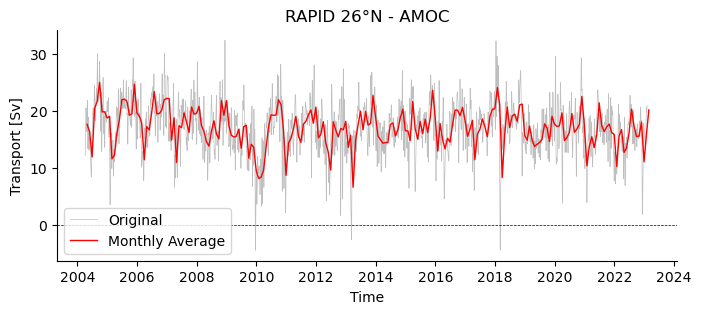

In [4]:
import matplotlib.pyplot as plt

# Resample the dataset to monthly averages
ds_monthly = ds_rapid.resample(TIME="ME").mean()

# Initialize the figure and axes with a specific figure size
fig, axes = plt.subplots(figsize=(8, 3))

# Plot the original dataset in thin grey
plt.plot(
    ds_rapid["TIME"],
    ds_rapid["moc_mar_hc10"],
    color="grey",
    alpha=0.5,
    linewidth=0.5,
    label="Original",
)

# Plot the monthly averaged dataset in thick red
plt.plot(
    ds_monthly["TIME"],
    ds_monthly["moc_mar_hc10"],
    color="red",
    linewidth=1,
    label="Monthly Average",
)

# Add a horizontal line at y=0
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Customize the axes
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)

# Add title and labels
plt.title("RAPID 26°N - AMOC")
plt.xlabel("Time")
plt.ylabel("Transport [Sv]")
plt.legend()

### Load MOVE 16°N

In [5]:
datasets16 = readers.load_dataset("move")
ds_move = datasets16[0]
plotters.show_variables(ds_move)

20250418T185420 INFO     setup_logger Logger initialized for array: move, writing to C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\logs\MOVE_20250418T18_read.log
20250418T185420 INFO     log_info Loading dataset for array: move
20250418T185420 INFO     read_move Starting to read MOVE dataset
20250418T185420 INFO     resolve_file_path Using cached file: C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\data\OS_MOVE_TRANSPORTS.nc
20250418T185420 INFO     read_move Opening MOVE dataset: C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\data\OS_MOVE_TRANSPORTS.nc
20250418T185420 INFO     read_move Attaching metadata to dataset from file: OS_MOVE_TRANSPORTS.nc
20250418T185420 DEBUG    log_debug Attribute 'project' already exists in dataset attrs and will not be overwritten.
20250418T185420 DEBUG    log_debug Attribute 'comment' already exists in dataset attrs and will not be overwritten.
20250418T185420 DEBUG    log_debug Attribute 'acknowledgement' already exists in dataset attrs and will no

Summary for array 'move':
Total datasets loaded: 1

Dataset 1:
  Source file: OS_MOVE_TRANSPORTS.nc
  Time coverage: 2000-01-01 to 2018-06-30
  Dimensions:
    - TIME: 6756
  Variables:
    - TRANSPORT_TOTAL: shape (6756,)
    - transport_component_internal: shape (6756,)
    - transport_component_internal_offset: shape (6756,)
    - transport_component_boundary: shape (6756,)

information is based on xarray Dataset


,dims,units,comment,standard_name,dtype
name,,,,,
TIME,TIME,,,time,datetime64[ns]
TRANSPORT_TOTAL,TIME,Sverdrup,,ocean_volume_transport_across_line,float64
transport_component_boundary,TIME,Sverdrup,,,float64
transport_component_internal,TIME,Sverdrup,,,float64
transport_component_internal_offset,TIME,Sverdrup,,,float64


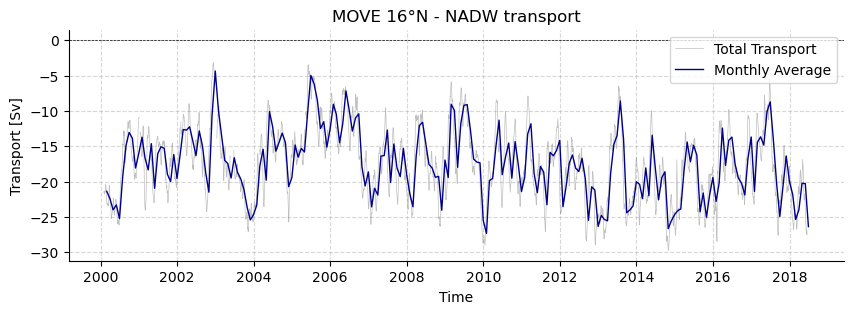

In [6]:
# Resample the dataset to monthly averages
ds_monthly = ds_move.resample(TIME="ME").mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the total transport from the MOVE dataset in thin grey
ax.plot(
    ds_move["TIME"],
    ds_move["TRANSPORT_TOTAL"],
    color="grey",
    alpha=0.5,
    linewidth=0.5,
    label="Total Transport",
)

# Plot the monthly averaged dataset in thick red
ax.plot(
    ds_monthly["TIME"],
    ds_monthly["TRANSPORT_TOTAL"],
    color="darkblue",
    linewidth=1,
    label="Monthly Average",
)
# Add a horizontal line at y=0
ax.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Customize the axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add labels, title, and legend
ax.set_title("MOVE 16°N - NADW transport")
ax.set_xlabel("Time")
ax.set_ylabel("Transport [Sv]")
ax.legend()

# Customize the grid
ax.grid(True, linestyle="--", alpha=0.5)

### Load OSNAP

In [7]:
datasetsOSNAP = readers.load_dataset("osnap")
ds_osnap = datasetsOSNAP[0]
plotters.show_variables(ds_osnap)

20250418T185421 INFO     setup_logger Logger initialized for array: osnap, writing to C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\logs\OSNAP_20250418T18_read.log
20250418T185421 INFO     log_info Loading dataset for array: osnap
20250418T185421 INFO     read_osnap Starting to read OSNAP dataset
20250418T185421 INFO     resolve_file_path Downloading file from https://repository.gatech.edu/bitstreams/e039e311-dd2e-4511-a525-c2fcfb3be85a/download to C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\data
20250418T185421 INFO     read_osnap Opening OSNAP dataset: C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\data\download
20250418T185421 INFO     read_osnap Attaching metadata to dataset from file: OSNAP_MOC_MHT_MFT_TimeSeries_201408_202006_2023.nc
20250418T185421 DEBUG    log_debug Attribute 'project' already exists in dataset attrs and will not be overwritten.
20250418T185421 INFO     read_osnap Successfully loaded 1 OSNAP dataset(s)
20250418T185421 INFO     log_info Successfully loade

Summary for array 'osnap':
Total datasets loaded: 1

Dataset 1:
  Source file: OSNAP_MOC_MHT_MFT_TimeSeries_201408_202006_2023.nc
  Time coverage: 2014-08-01 to 2020-06-01
  Dimensions:
    - TIME: 71
  Variables:
    - MOC_ALL: shape (71,)
    - MOC_ALL_ERR: shape (71,)
    - MOC_EAST: shape (71,)
    - MOC_EAST_ERR: shape (71,)
    - MOC_WEST: shape (71,)
    - MOC_WEST_ERR: shape (71,)
    - MHT_ALL: shape (71,)
    - MHT_ALL_ERR: shape (71,)
    - MHT_EAST: shape (71,)
    - MHT_EAST_ERR: shape (71,)
    - MHT_WEST: shape (71,)
    - MHT_WEST_ERR: shape (71,)
    - MFT_ALL: shape (71,)
    - MFT_ALL_ERR: shape (71,)
    - MFT_EAST: shape (71,)
    - MFT_EAST_ERR: shape (71,)
    - MFT_WEST: shape (71,)
    - MFT_WEST_ERR: shape (71,)

information is based on xarray Dataset


,dims,units,comment,standard_name,dtype
name,,,,,
MFT_ALL,TIME,Sv,,,float64
MFT_ALL_ERR,TIME,Sv,Determined from a Monte Carlo analysis,,float64
MFT_EAST,TIME,Sv,,,float64
MFT_EAST_ERR,TIME,Sv,Determined from a Monte Carlo analysis,,float64
MFT_WEST,TIME,Sv,,,float64
MFT_WEST_ERR,TIME,Sv,Determined from a Monte Carlo analysis,,float64
MHT_ALL,TIME,PW,,,float64
MHT_ALL_ERR,TIME,PW,Determined from a Monte Carlo analysis,,float64
MHT_EAST,TIME,PW,,,float64


### Load SAMBA 34.5°S

In [8]:
datasets34S = readers.load_dataset("SAMBA")
standardised_datasets = [
    standardise.standardise_samba(ds, ds.attrs["source_file"]) for ds in datasets34S
]

20250418T185421 INFO     setup_logger Logger initialized for array: SAMBA, writing to C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\logs\SAMBA_20250418T18_read.log
20250418T185421 INFO     log_info Loading dataset for array: SAMBA
20250418T185421 INFO     log_info Starting to read SAMBA dataset
20250418T185421 INFO     resolve_file_path Using cached file: C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\data\Upper_Abyssal_Transport_Anomalies.txt
20250418T185421 INFO     log_info Attaching metadata to SAMBA dataset from file: Upper_Abyssal_Transport_Anomalies.txt
20250418T185421 INFO     resolve_file_path Using cached file: C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\data\MOC_TotalAnomaly_and_constituents.asc
20250418T185421 INFO     log_info Attaching metadata to SAMBA dataset from file: MOC_TotalAnomaly_and_constituents.asc
20250418T185421 INFO     log_info Successfully loaded 2 SAMBA dataset(s)
20250418T185421 INFO     log_info Successfully loaded 2 dataset(s) for array: SAMBA
2

Summary for array 'SAMBA':
Total datasets loaded: 2

Dataset 1:
  Source file: Upper_Abyssal_Transport_Anomalies.txt
  Time coverage: 2013-09-12 to 2017-07-16
  Dimensions:
    - TIME: 1404
  Variables:
    - Upper-cell volume transport anomaly (relative to record-length average of 17.3 Sv): shape (1404,)
    - Abyssal-cell volume transport anomaly (relative to record-length average of 7.8 Sv): shape (1404,)

Dataset 2:
  Source file: MOC_TotalAnomaly_and_constituents.asc
  Time coverage: 2009-03-19 to 2017-04-29
  Dimensions:
    - TIME: 2964
  Variables:
    - Total MOC anomaly (relative to record-length average of 14.7 Sv): shape (2964,)
    - Relative (density gradient) contribution to the MOC anomaly: shape (2964,)
    - Reference (bottom pressure gradient) contribution to the MOC anomaly: shape (2964,)
    - Ekman (wind) contribution to the MOC anomaly: shape (2964,)
    - Western density contribution to the MOC anomaly: shape (2964,)
    - Eastern density contribution to the MOC

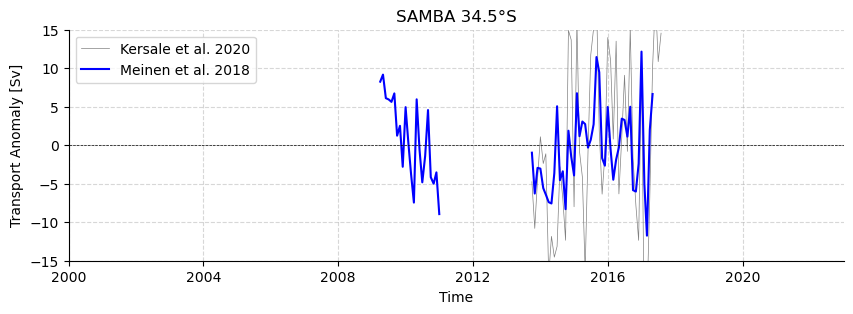

In [9]:
# Extract the upper and abyssal transport data
ds = standardised_datasets[0]
upper_transport = ds["UPPER_TRANSPORT"]
ds2 = standardised_datasets[1]
moc_meinen = ds2["MOC"]


# Resample the dataset to monthly averages
upper_transport_monthly = upper_transport.resample(TIME="ME").mean()
moc_meinen_monthly = moc_meinen.resample(TIME="ME").mean()
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the original upper transport in thin blue
ax.plot(
    upper_transport_monthly["TIME"],
    upper_transport_monthly,
    color="grey",
    linewidth=0.5,
    label="Kersale et al. 2020",
)
ax.plot(
    moc_meinen_monthly["TIME"],
    moc_meinen_monthly,
    color="blue",
    alpha=1,
    linewidth=1.5,
    label="Meinen et al. 2018",
)


# Add a horizontal line at y=0
ax.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Customize the axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add labels, title, and legend
ax.set_title("SAMBA 34.5°S")
ax.set_xlabel("Time")
ax.set_ylabel(
    f"{upper_transport.attrs['standard_name']} [{upper_transport.attrs['units']}]"
)
ax.legend()
# Set the x-axis limits from 2000 to 2022
import pandas as pd

ax.set_xlim([pd.Timestamp("2000-01-01"), pd.Timestamp("2022-12-31")])

# Set the y-axis limits from -15 to 15
ax.set_ylim([-15, 15])

# Customize the grid
ax.grid(True, linestyle="--", alpha=0.5)

### Load FW2015


In [10]:
datasetsfw2015 = readers.load_dataset("fw2015")
ds_fw2015 = datasetsfw2015[0]
plotters.show_variables(ds_fw2015)

20250418T185421 INFO     setup_logger Logger initialized for array: fw2015, writing to C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\logs\FW2015_20250418T18_read.log
20250418T185421 INFO     log_info Loading dataset for array: fw2015
20250418T185421 INFO     log_info Starting to read FW2015 dataset
20250418T185421 INFO     resolve_file_path Downloading file from https://figshare.com/ndownloader/files/3369779 to C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\data
20250418T185421 INFO     read_fw2015 Opening fw2015 file: C:\Users\Isabelle\Dokumente\Work\AMOC\amocarray\data\3369779
20250418T185421 INFO     read_fw2015 Attaching metadata to FW2015 dataset from file: FW2015_MOC_proxy.mat
20250418T185421 INFO     read_fw2015 Successfully loaded 1 FW2015 dataset(s)
20250418T185421 INFO     log_info Successfully loaded 1 dataset(s) for array: fw2015
20250418T185421 INFO     log_info 
Summary for array 'fw2015':
Total datasets loaded: 1

Dataset 1:
  Source file: FW2015_MOC_proxy.mat
  Time 

Summary for array 'fw2015':
Total datasets loaded: 1

Dataset 1:
  Source file: FW2015_MOC_proxy.mat
  Time coverage: 1993-01-15 to 2014-12-15
  Dimensions:
    - TIME: 264
  Variables:
    - MOC: shape (264,)
    - EK: shape (264,)
    - H1UMO: shape (264,)

information is based on xarray Dataset


,dims,units,comment,standard_name,dtype
name,,,,,
EK,TIME,,,,float64
H1UMO,TIME,,,,float64
MOC,TIME,,,,float64
TIME,TIME,,,,datetime64[ns]


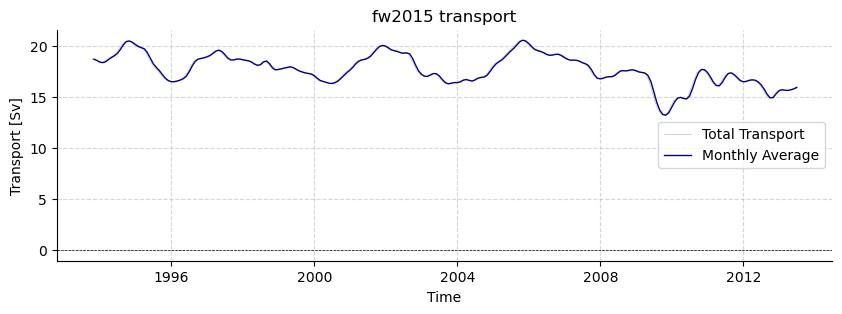

In [ ]:
# Resample the dataset to monthly averages
ds_monthly = ds_fw2015.resample(TIME="ME").mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the total transport from the MOVE dataset in thin grey
ax.plot(
    ds_fw2015["TIME"],
    ds_fw2015["MOC"],
    color="grey",
    alpha=0.5,
    linewidth=0.5,
    label="Total Transport",
)

# Plot the monthly averaged dataset in thick red
ax.plot(
    ds_monthly["TIME"],
    ds_monthly["MOC"],
    color="darkblue",
    linewidth=1,
    label="Monthly Average",
)
# Add a horizontal line at y=0
ax.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Customize the axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add labels, title, and legend
ax.set_title("FW2015 transport")
ax.set_xlabel("Time")
ax.set_ylabel("Transport [Sv]")
ax.legend()

# Customize the grid
ax.grid(True, linestyle="--", alpha=0.5)

### Overview of arrays

(<Figure size 600x900 with 5 Axes>,
 array([<Axes: title={'center': 'OSNAP'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'RAPID 26°N'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'MOVE 16°N'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'SAMBA 34.5°S'}, xlabel='Time', ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'FW2015'}, xlabel='Time', ylabel='Transport [Sv]'>],
       dtype=object))

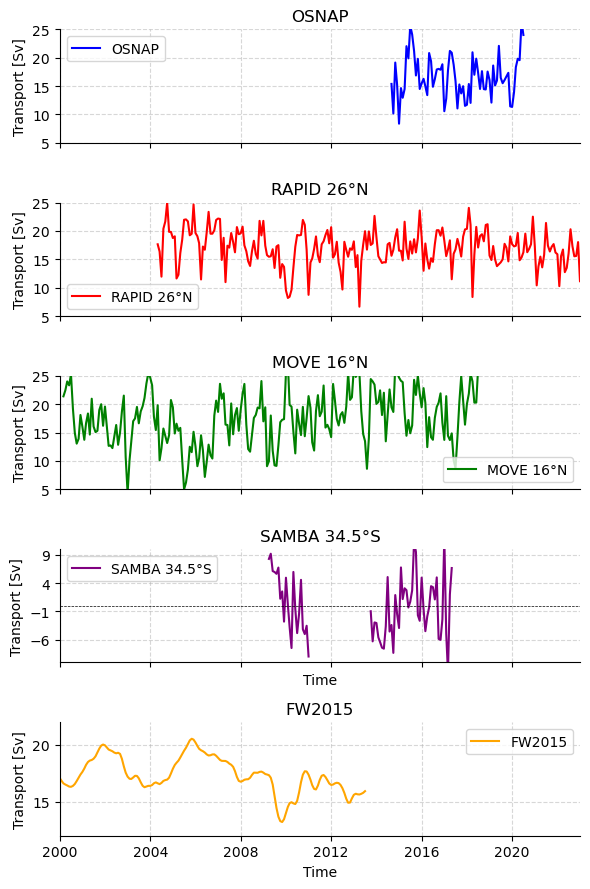

In [15]:
importlib.reload(plotters)
plotters.plot_monthly_anomalies(
    osnap_data=ds_osnap["MOC_ALL"],
    rapid_data=ds_rapid["moc_mar_hc10"],
    move_data=-ds_move["TRANSPORT_TOTAL"],
    samba_data=standardised_datasets[1]["MOC"], 
    fw2015_data = ds_fw2015["MOC"],
    osnap_label="OSNAP",
    rapid_label="RAPID 26°N",
    move_label="MOVE 16°N",
    samba_label="SAMBA 34.5°S",
    fw2015_label="FW2015",
)